Задание 1

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [11]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random state должен быть равен 42.

In [14]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(boston['target'], columns=['price'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

In [18]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()

LinearRegression()

Обучите модель на тренировочных данных (используйте все признаки)

In [23]:
ln.fit(X_train, y_train)

LinearRegression()

Cделайте предсказание на тестовых

In [25]:
y_pred = ln.predict(X_test)


In [28]:
y_pred.shape

(152, 1)

Задание 2

Создайте модель под названием model с помощью класса RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.

In [29]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

In [31]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

Сделайте предсказание на тестовых данных

In [42]:
y_pred_rf_mod = model.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

check_test = pd.DataFrame({
    'y_test': y_test['price'],
    'y_pred_rf': y_pred_rf_mod.flatten(), 'y_pred_lr': y_pred.flatten(),
})


In [56]:
check_test.head()

,y_test,y_pred_rf,y_pred_lr
173,23.6,22.806412,28.648960
274,32.4,31.131464,36.495014
491,13.6,16.339125,15.411193
72,22.8,23.810726,25.403213
452,16.1,17.139521,18.855280


Посчитайте R2. Сравните с результатом из предыдущего задания.

In [57]:
print('mse LRM=', mean_squared_error(check_test.y_test, check_test.y_pred_lr))
print('R2 LRM=', r2_score(check_test.y_test, check_test.y_pred_lr))

mse LRM= 21.517444231176995
R2 LRM= 0.711226005748496


In [58]:
print('mse RFM=', mean_squared_error(check_test.y_test, check_test.y_pred_rf))
print('R2 RFM =', r2_score(check_test.y_test, check_test.y_pred_rf))

mse RFM= 9.334548946165196
R2 RFM = 0.87472606157312


Напишите в комментариях к коду, какая модель в данном случае работает лучше.

На основании стравнения показателей R2 b mse можно сделать вывод, что модель случайных лесов работает лучше, т.к. ее показатель R2 выше на 0,18 (0,87-0.71) и средняя квадратическая ошибка в два раза меньше. 

Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.

In [59]:
RandomForestRegressor?

feature_importances_ : ndarray of shape (n_features,)
     The impurity-based feature importances.
     The higher, the more important the feature.
     The importance of a feature is computed as the (normalized)
     total reduction of the criterion brought by that feature. It is also
     known as the Gini importance.

     Warning: impurity-based feature importances can be misleading for
     high cardinality features (many unique values). See
     :func:`sklearn.inspection.permutation_importance` as an alternative.

Если я правильно понял, то эта функция работеть будет правильно если признаки нормализованы. А пока мы этого не сделали, следовательно вначале необходимо нормализовать признаки.

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns=boston.feature_names)
X_test_scaler = scaler.fit_transform(X_test)
X_test_scaler = pd.DataFrame(X_test, columns=boston.feature_names)
X_test_scaler.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [65]:
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train_scaler, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [66]:
rfr_model.n_features_

13

In [67]:
rfr_model.feature_names_in_

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

In [68]:
rfr_model.feature_importances_

array([0.03173083, 0.00159051, 0.00678511, 0.00159958, 0.01263682,
       0.43958489, 0.01202165, 0.06612009, 0.00404995, 0.01178936,
       0.019494  , 0.01265621, 0.37994101])

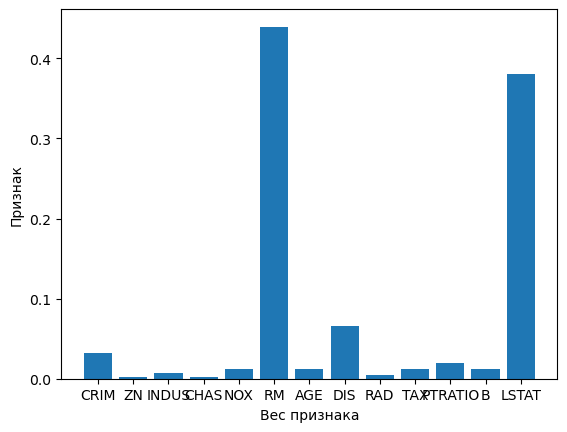

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(rfr_model.feature_names_in_, rfr_model.feature_importances_)
plt.xlabel('Вес признака')
plt.ylabel('Признак')
plt.show()

Если я правильно понял, считает по всем имеющимся в таблице признакам, которых 13 штук. Ну а самыми важными модель считает RM (average number of rooms per dwelling) и LSTAT (% lower status of the population), таким образом пристижный район и количество комнат имеет значение :) 

In [74]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu